## Task 3 by:
### Gil Abramovich, 314722372
### Dor Natan, 315533067

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"
youtube_df = pd.read_csv(url)
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


q1

In [91]:
youview = youtube_df["views"].max()
maxrowview = youtube_df.loc[youtube_df.views == youview]
maxrowview[["title","publish_time","views"]]

,title,publish_time,views
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06T17:58:51.000Z,149376127


q2

In [73]:
maxviewcha = youtube_df.groupby('channel_title')[['views']].max()
maxviewcha.sort_values(by=['views'],ascending=False).head(3)

,views
channel_title,
YouTube Spotlight,149376127
LuisFonsiVEVO,102012605
Marvel Entertainment,91933007


q3

In [92]:
youcorr = youtube_df[["likes", "dislikes", "views", "comment_count"]].corr(method='spearman')
youcorr

,likes,dislikes,views,comment_count
likes,1.000000,0.801154,0.877789,0.881849
dislikes,0.801154,1.000000,0.866979,0.843331
views,0.877789,0.866979,1.000000,0.840532
comment_count,0.881849,0.843331,0.840532,1.000000


q4

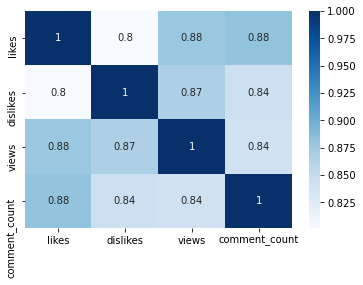

In [94]:
ax = sns.heatmap(youcorr,cmap="Blues",annot = True)

q5

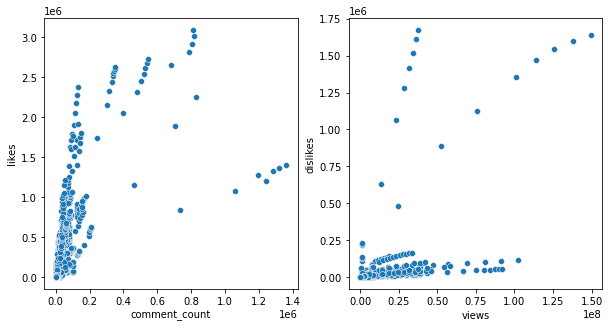

In [126]:
np.fill_diagonal(youcorr.values,np.nan)
maxval = youcorr.idxmax()
rowklist = maxval.keys()
fig,axis = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(ax = axis[0],data=youtube_df,x=maxval[0],y=rowklist[0] )
sns.scatterplot(ax = axis[1],data=youtube_df,x=maxval[1],y=rowklist[1] )
plt.show()

q6

In [116]:
youtube_df['year'] = pd.DatetimeIndex(youtube_df.publish_time).year
year = pd.cut(youtube_df['year'], [2017,2018])
youtube_df.pivot_table('views',[year,'category_id'],aggfunc={'views':sum})

views
year         category_id           
(2017, 2018] 1            144072937
             2              8047346
             10           839810930
             15            32629265
             17            61660329
             19             7583452
             20            84176667
             22            67849434
             23           197147385
             24           645333656
             25            48419659
             26            89889352
             27            48936175
             28            85462155
             29              229172